In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv("D:/Excel/Crude-Oil_160101-221213.csv", index_col = 'Date', parse_dates = True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-06,77.35,77.88,73.41,74.25,74.25,380598
2022-12-07,74.55,75.38,71.75,72.01,72.01,392236
2022-12-08,72.38,75.44,71.12,71.46,71.46,474459
2022-12-09,71.85,72.92,70.08,71.02,71.02,356722
2022-12-12,71.79,73.99,70.25,73.17,73.17,356722


In [14]:
df['Time'] = np.arange(len(df.index))
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2022-12-06,77.35,77.88,73.41,74.25,74.25,380598,1744
2022-12-07,74.55,75.38,71.75,72.01,72.01,392236,1745
2022-12-08,72.38,75.44,71.12,71.46,71.46,474459,1746
2022-12-09,71.85,72.92,70.08,71.02,71.02,356722,1747
2022-12-12,71.79,73.99,70.25,73.17,73.17,356722,1748


<AxesSubplot:xlabel='Date'>

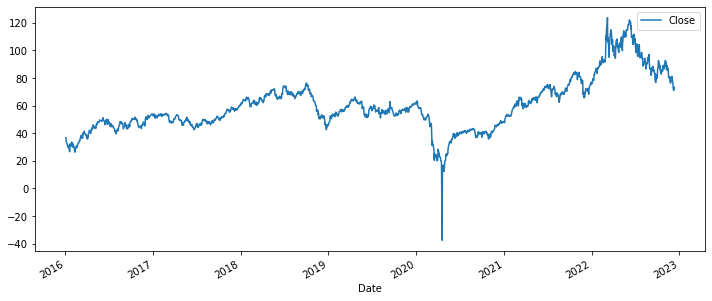

In [15]:
df.plot(y = 'Close', figsize = (12,5))

In [16]:
x = df.loc[:, ['Time']]
y = df.loc[:, 'Close']

# Train the model
model = LinearRegression()
model.fit(x, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(x), index = x.index)

In [17]:
# Create Training and Test
train = df.Close[:round(len(df) * 0.8)]
test = df.Close[round(len(df) * 0.8):]

In [18]:
print('Train:', len(train))
print('Test:', len(test))

Train: 1399
Test: 350


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

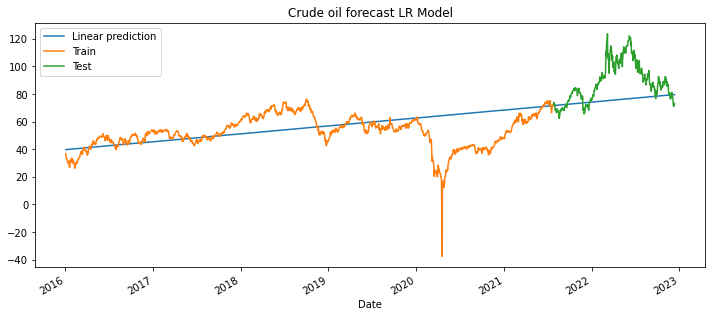

In [21]:
plt.figure(figsize = (12,5))
plt.title('Crude oil forecast LR Model')
y_pred.plot(label = 'Linear prediction')
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mse =  mean_squared_error(y_test, test)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, test)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  38.40433065981715
MAPE:  73.9906006335023
